# MODEL CREATION FOR AGE AND GENDER DETECTION - 

problem statement - BOSCH's age and gender detection

dataset used - UTKFace dataset

### Importing Libraries - 

In [33]:
import cv2
import math
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling, Activation
from tensorflow.keras.optimizers import Adam, SGD
from mtcnn import MTCNN
from PIL import Image

### forming dataset - 

In [2]:
folder = 'train_faces_data' #local folder

paths = [folder + '\\' + i for i in os.listdir(folder)]
random.shuffle(paths)

ygender = []
yage = []

upperlimit = 5000
paths = paths[0:upperlimit]

images = np.array([np.array(Image.open(img).convert('RGB').resize((48,48), Image.ANTIALIAS)) for img in paths])

for i in paths:
    ygender.append(int(i.split('\\')[-1].split('_')[1]))
    yage.append(int(i.split('\\')[-1].split('_')[0]))

ygender = pd.DataFrame(ygender)
yage = np.array(yage)

In [3]:
images.shape, ygender.shape, yage.shape

((5000, 48, 48, 3), (5000, 1), (5000,))

In [4]:
ygender = ygender.replace({1:'F', 0:'M'})
ygender = pd.get_dummies(ygender)
ygender.head()

,0_F,0_M
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


### testing random image - 

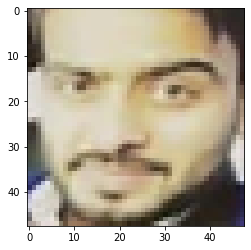

In [17]:
plt.imshow(images[np.random.randint(0, len(images))])

### Model training - 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, ygender)

In [7]:
gender_model = Sequential()

gender_model.add(Rescaling(1./255))
gender_model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,3)))
gender_model.add(Dropout(0.1))
gender_model.add(Activation('relu'))
gender_model.add(MaxPool2D(strides=2))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(Dropout(0.1))
gender_model.add(Activation('relu'))
gender_model.add(MaxPool2D(strides=2))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(Dropout(0.1))
gender_model.add(Activation('relu'))
gender_model.add(MaxPool2D(strides=2))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())
gender_model.add(Dense(100, activation='relu'))

gender_model.add(Dense(2, activation='relu', name='gender'))
gender_model.compile(optimizer=Adam(learning_rate=0.00001), loss='MAE', metrics=['accuracy', 'mae'])
gender_model.fit(X_train, Y_train, epochs=15, batch_size=1, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/15
3750/3750 [==============================] - 38s 9ms/step - loss: 0.4626 - accuracy: 0.6373 - mae: 0.4626 - val_loss: 0.4495 - val_accuracy: 0.5992 - val_mae: 0.4495
Epoch 2/15
3750/3750 [==============================] - 39s 10ms/step - loss: 0.3927 - accuracy: 0.7243 - mae: 0.3927 - val_loss: 0.4370 - val_accuracy: 0.6264 - val_mae: 0.4370
Epoch 3/15
3750/3750 [==============================] - 39s 10ms/step - loss: 0.3521 - accuracy: 0.7664 - mae: 0.3521 - val_loss: 0.4232 - val_accuracy: 0.6136 - val_mae: 0.4232
Epoch 4/15
3750/3750 [==============================] - 39s 10ms/step - loss: 0.3225 - accuracy: 0.7965 - mae: 0.3225 - val_loss: 0.4136 - val_accuracy: 0.6224 - val_mae: 0.4136
Epoch 5/15
3750/3750 [==============================] - 39s 10ms/step - loss: 0.3014 - accuracy: 0.8176 - mae: 0.3014 - val_loss: 0.4074 - val_accuracy: 0.6520 - val_mae: 0.4074
Epoch 6/15
3750/3750 [==============================] - 38s 10ms/step - loss: 0.2730 - accuracy: 0.8456 - mae: 

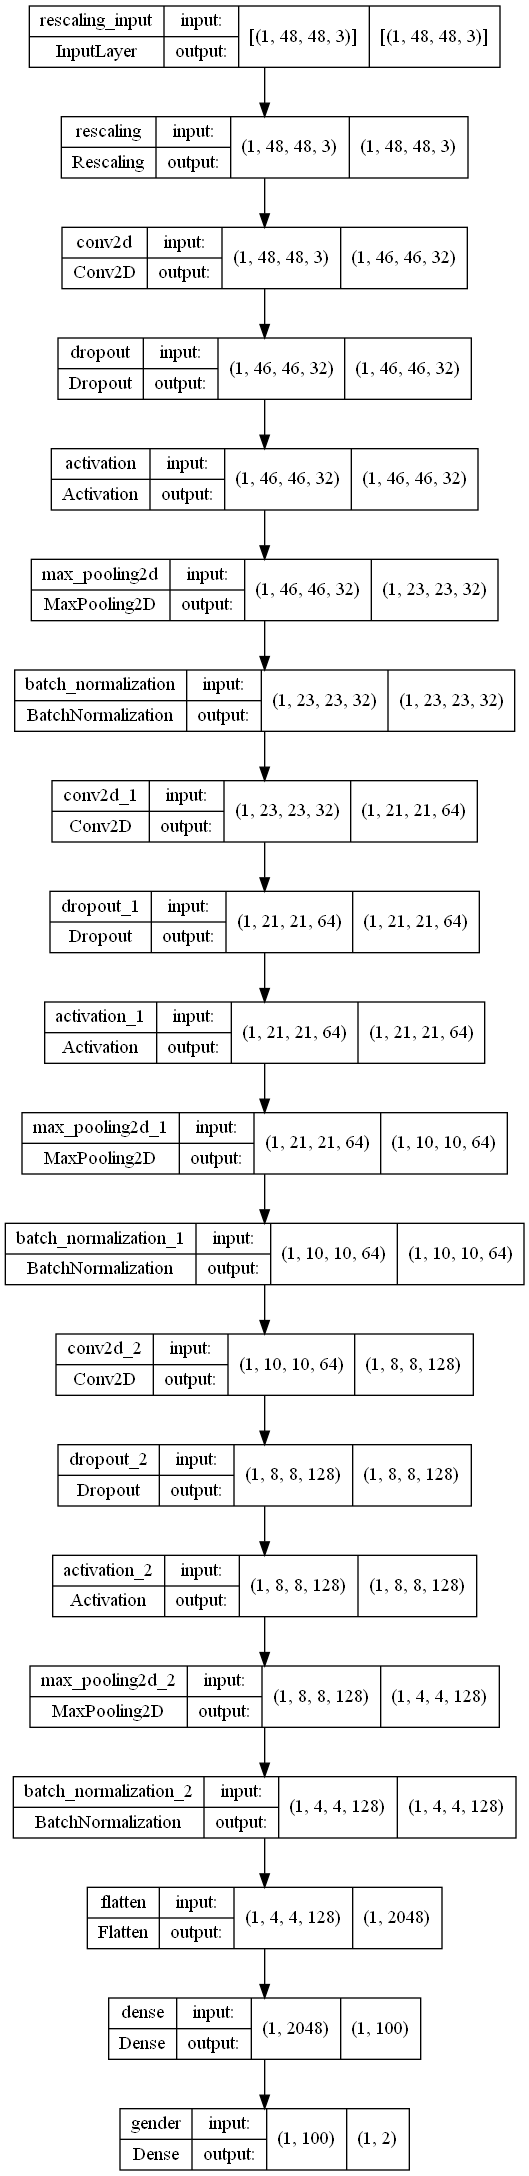

In [8]:
tf.keras.utils.plot_model(gender_model, to_file='Gender model plot.png', show_shapes=True)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(images, yage)

In [14]:
age_model = Sequential()

age_model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,3)))
age_model.add(Dropout(0.1))
age_model.add(Activation('relu'))
age_model.add(MaxPool2D(strides=2))
age_model.add(BatchNormalization())
              
age_model.add(Conv2D(64, kernel_size=3, activation='relu'))
age_model.add(Dropout(0.1))
age_model.add(Activation('relu'))
age_model.add(MaxPool2D(strides=2))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(Dropout(0.1))
age_model.add(Activation('relu'))
age_model.add(MaxPool2D(strides=2))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(100, activation='relu'))
age_model.add(Dense(100, activation='relu'))
age_model.add(Dense(100, activation='relu'))
age_model.add(Dense(100, activation='relu'))

age_model.add(Dense(1, activation='relu', name='gender'))
age_model.compile(optimizer=Adam(learning_rate=0.00003), loss=tf.keras.losses.MAE, metrics=['accuracy', 'mae'])
age_model.fit(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
3750/3750 [==============================] - 58s 15ms/step - loss: 16.9484 - accuracy: 0.0355 - mae: 16.9484 - val_loss: 15.8287 - val_accuracy: 0.0384 - val_mae: 15.8287
Epoch 2/50
3750/3750 [==============================] - 57s 15ms/step - loss: 11.3503 - accuracy: 0.0435 - mae: 11.3503 - val_loss: 14.4324 - val_accuracy: 0.0384 - val_mae: 14.4324
Epoch 3/50
3750/3750 [==============================] - 57s 15ms/step - loss: 9.9586 - accuracy: 0.0355 - mae: 9.9586 - val_loss: 14.1344 - val_accuracy: 0.0360 - val_mae: 14.1344
Epoch 4/50
3750/3750 [==============================] - 56s 15ms/step - loss: 9.0582 - accuracy: 0.0373 - mae: 9.0582 - val_loss: 14.4749 - val_accuracy: 0.0384 - val_mae: 14.4749
Epoch 5/50
3750/3750 [==============================] - 57s 15ms/step - loss: 8.2675 - accuracy: 0.0405 - mae: 8.2675 - val_loss: 14.3960 - val_accuracy: 0.0384 - val_mae: 14.3960
Epoch 6/50
3750/3750 [==============================] - 56s 15ms/step - loss: 7.6260 - accuracy:

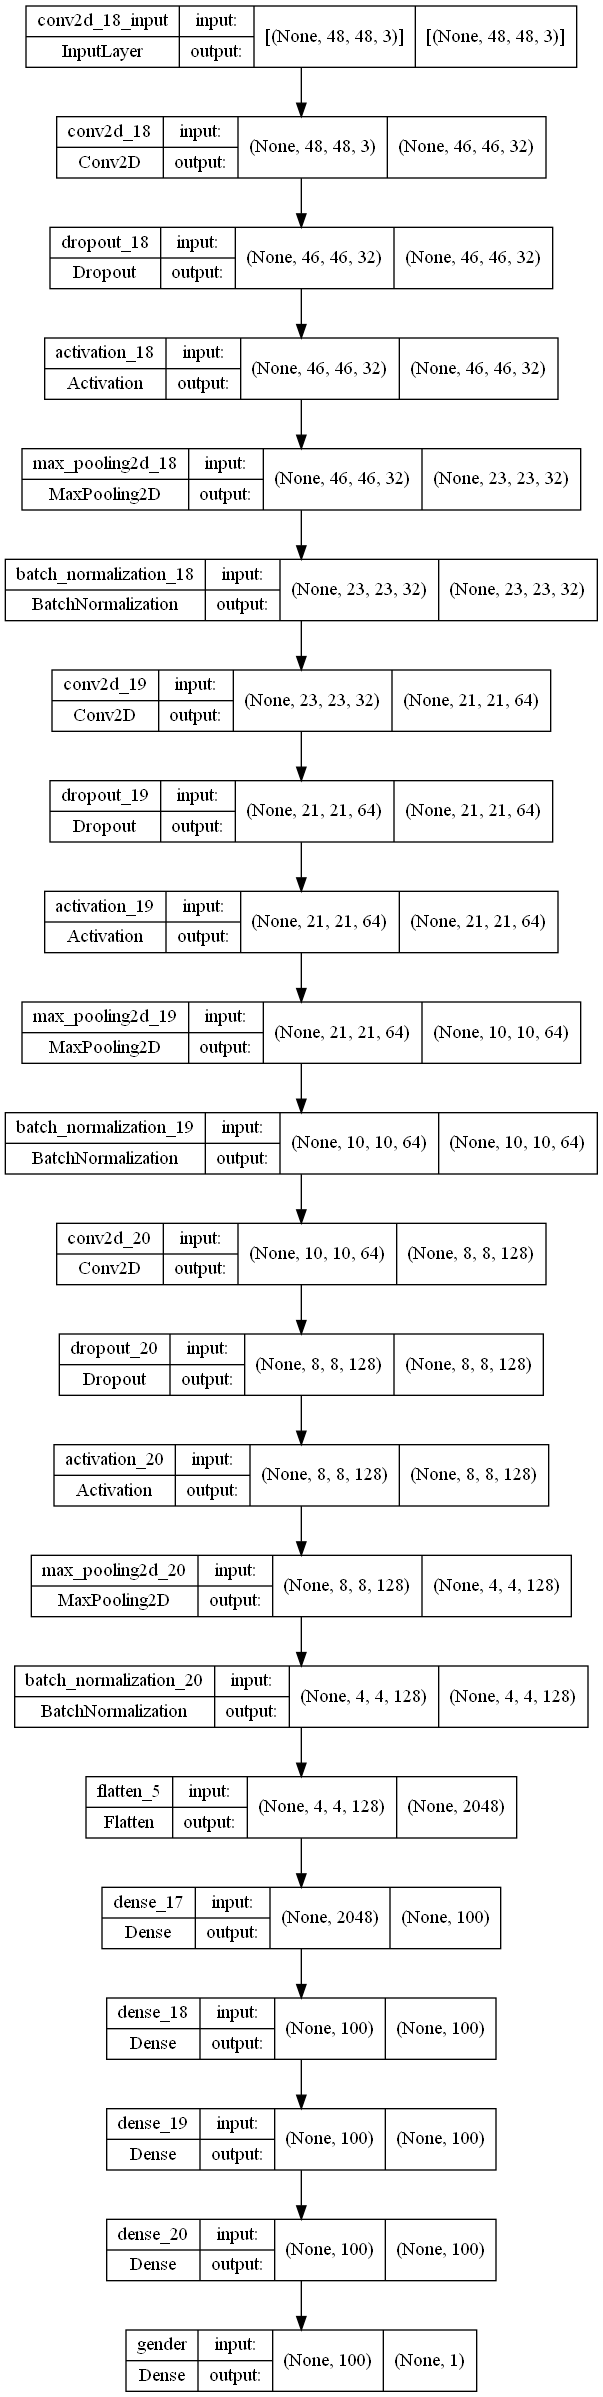

In [15]:
tf.keras.utils.plot_model(age_model, to_file='Age model plot.png', show_shapes=True)

### Saving models - 

In [16]:
age_model.save('Age_model')
gender_model.save('Gender_model')

INFO:tensorflow:Assets written to: Age_model\assets
INFO:tensorflow:Assets written to: Gender_model\assets


### Test image - 

Text(0.5, 1.0, 'Gender - Male\nAge - 25')

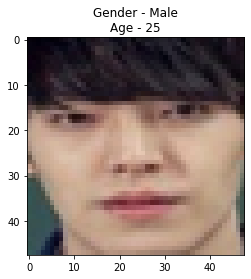

In [56]:
# selecting image
randomnumber = np.random.randint(0, len(images))
randomimage = images[randomnumber]
randomimage = randomimage.reshape(1, 48, 48, 3)

# predictions
gp = gender_model.predict(randomimage)
if (gp[0][1] > gp[0][0]): genderprediction = 'Male'
else: genderprediction = 'Female'

ageprediction = math.ceil(age_model.predict(randomimage)[0][0])

# plotting
plt.imshow(randomimage[0])
plt.title(f'Gender - {genderprediction}\nAge - {ageprediction}')